# Pytorch Workflow

Lets explore an example Pytorch end-to-end workflow



In [1]:
what_were_covering ={1: "data (prepare and load)",
                     2: "bild model",
                     3: "fitting the model to data (training)",
                     4: "making predictions and evaluating a model (interference)",
                     5: "saving and loading a model",
                     6: "putiing it all together" }
what_were_covering



{1: 'data (prepare and load)',
 2: 'bild model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (interference)',
 5: 'saving and loading a model',
 6: 'putiing it all together'}

In [2]:
import torch
from torch import nn # nn contains all of Pytorch's building blocks
import matplotlib.pyplot as plt

# Check Pytorch version
torch.__version__


'2.1.0+cu121'

## Data (preparing and loading)

Data can be almost everything..in ML

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data)
* Audio like songs or podcasts
* DNA
* Text


Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.



we'll use a linear regression formula to make a straight line with known **parameters**

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3
 # Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end , step).unsqueeze(dim=1)
Y = weight * X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X) , len(Y)

(50, 50)

## Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a  training and test set with our data

In [5]:
# Create a train/test split
train_split =int(0.8 * len(X))
X_train, Y_train =X[:train_split],Y[:train_split]
X_test, Y_test =X[train_split:],Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)



(40, 40, 10, 10)

In [6]:
X_train, Y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize our data?


This is where the data explorer's motto comes in!


"Visualize,visualize,visualize!"

In [7]:
def plot_predictions(train_data=X_train,
                      train_labels=Y_train,
                      test_data=X_test,
                      test_labels=Y_test,
                      predictions=None):
  """
  Plots training data,test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot  training data in blue
  plt.scatter(train_data, train_labels, c="b" ,s=4, label="Training data")

  # Plot test data in Green
  plt.scatter(test_data, test_labels,c="g" , s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
  #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  # show the legend
  plt.legend(prop={"size":14});

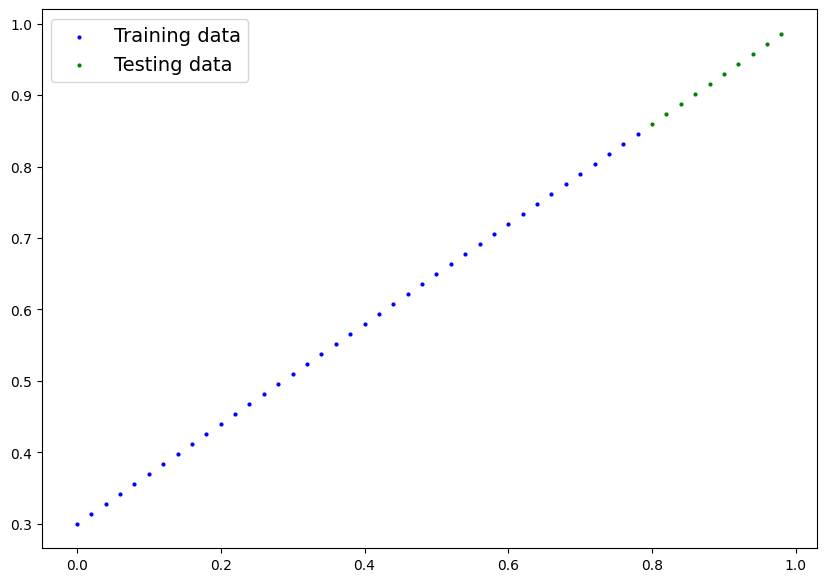

In [117]:
 plot_predictions();

## Build model
Our first Pytorch model!!

This is very exciting...let's do it!

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

1. Gradient descent
2. Backpropagation


In [20]:
import torch
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [9]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): #<- almost everything in Python
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.parameter(torch.randn(1,
                                         requires_grad=True,
                                          dtype=torch.float))
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) ->torch.Tensor: # <- "x" is the input data
      return self.weights * x +self.bias #this is the linaer regression formula

### Pytorch model building essentials

* torch.nn - contains all of the buildings for computational graphs(a neural network can  be considered a computational graph)
* torch.nn.parameter - what parameters should our model try and learn,often a Pytorch layer from torch.nn will set these for us
* torch.nn.nodule - The base class for all neural network module, if you subclass it,you should overwrite forward()
* torch.optim - this where the optimizers in Pytorch live , they will help with gradient descent.
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

In [21]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

## Checking the contents of our Pytorch model

Now we've created a model,let's see what's inside..

So we can check our model parameters or what's inside our model using`.parameters().`

In [22]:
# Create a random seed
#torch.manual_seed(42)


# Create an instance of the model (this is a subclass of nn.module)
model_0 = LinearRegressionModel()

 # Chcek out the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.1288], requires_grad=True),
 Parameter containing:
 tensor([0.2345], requires_grad=True)]

In [23]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.1288])), ('bias', tensor([0.2345]))])

In [24]:
weight, bias

(0.7, 0.3)

###Making prediction using `torch.interference_mode()`

To check our model's predictive power, let's see how well it predicts `Y_test` based on`X_test`

when we pass data through our model,it's going to ru it through the `forward()` method.

In [110]:
with torch.inference_mode():
 Y_preds =model_0(X_test)
Y_preds

tensor([[0.4103],
        [0.4134],
        [0.4165],
        [0.4196],
        [0.4227],
        [0.4258],
        [0.4289],
        [0.4320],
        [0.4351],
        [0.4382]])

In [48]:

# # Make predictions with model
# with torch.inference_mode():
#  Y_preds = model_0(X_Test)
with torch.no_grad():
  Y_preds = model_0(X_Test)

Y_preds

tensor([ 0.3323, -0.2285,  0.2369,  0.2480,  0.3582,  0.1614,  0.1610,  0.4403,
         0.2488,  0.2294])

In [111]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [113]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

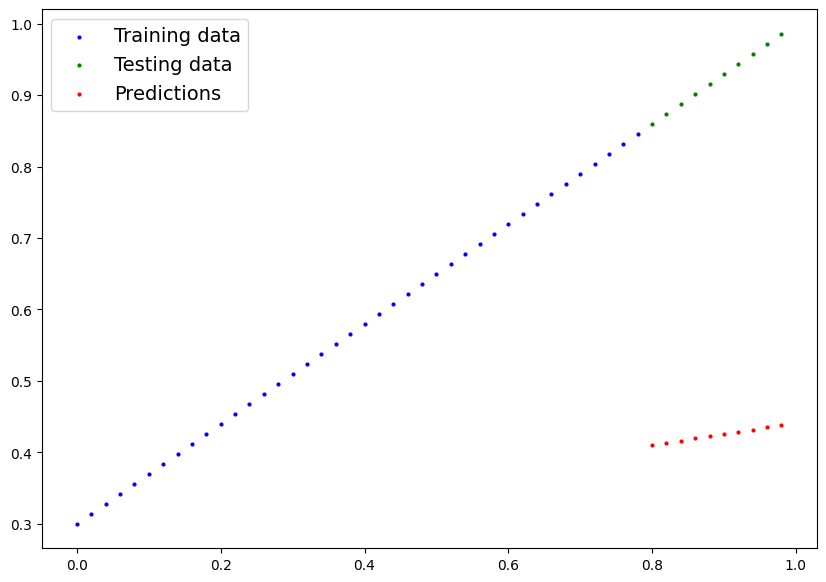

In [114]:
plot_predictions(predictions=Y_preds)

### 3.Train model
  
  The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.


  or in other words from a poor representation of the data to do a better representation of the data.

  one way to measure how poor or how wrong your models predictions are use a loss function.

  * Note: Loss function may also be called cost function or criterian in different areas.For our case, we're going to refer to it as a loss function.
   
   Things we need to train:

  * **Loss function:** A Function to measure how wrong your model's predictions are to the ideal outputs, lower is better .

  * **Optimizer:** Takes into account the loss of a model and adjusts the adjusts the model's parameters(e.g weight & bias)
  * Inside the optimizer you'll often have to set two parameters:
   * `params` - the model parameters you'd like to optimize,for example `params=model_0.parameters()`

   * lr(learning rate)- the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step(a small `lr` results in small changes,a large `lr` results in large changes)

  And specifically forPytorch,we need:

  * A training loop
  * A testing loop

In [50]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.1288], requires_grad=True),
 Parameter containing:
 tensor([0.2345], requires_grad=True)]

In [51]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.1288])), ('bias', tensor([0.2345]))])

In [119]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)    # lr = learning rate = possibly the most important hyperparameter you can set

### Building a training loop (and a testing loop) in Pytorch
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss(**backpropagation**)
5.Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [ ]:
with torch.no-grad()

In [120]:
with torch.inference_mode():
  list(model_0.parameters())

In [121]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.1550], requires_grad=True),
 Parameter containing:
 tensor([0.2863], requires_grad=True)]

In [122]:
X_test,Y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [182]:
import torch

torch.manual_seed(42)

# An epoch is one loop through the data..(this is hyperparameter because we've set it ourselves)
epochs = 1

# Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()  # train mode in PyTorch sets all the parameters that require gradients to require gradients

    # Forward pass
    Y_pred = model_0(X_train)

    # Calculate the loss
    loss = loss_fn(Y_pred, Y_train)
    print(f"loss: {loss}")

    # Optimizer zero grad
    optimizer.zero_grad()

    # Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # Step the optimizer (perform gradient descent)
    optimizer.step()

    # Set the model to evaluation mode
    model_0.eval()  # turns off gradient tracking
    with torch.no_grad():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, Y_test)
        if epoch % 10 == 0:
            print(f"Epoch:{epoch} | Loss: {loss} |Test loss: {test_loss}")
            print(model_0.state_dict())


loss: 0.10786262899637222
Epoch:0 | Loss: 0.10786262899637222 |Test loss: 0.30122268199920654
OrderedDict([('weights', tensor([0.2275])), ('bias', tensor([0.4193]))])


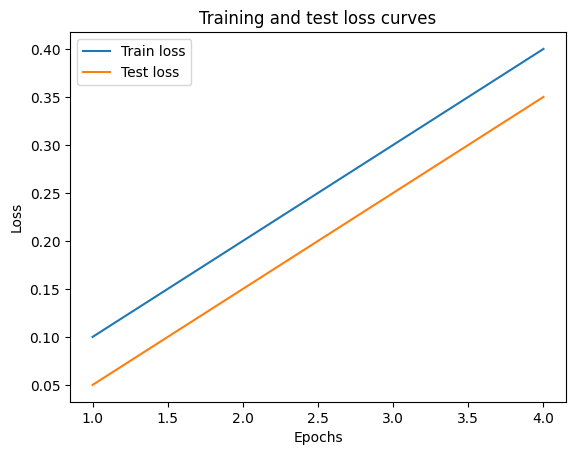

In [191]:
# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [180]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [183]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.2275])), ('bias', tensor([0.4193]))])

In [169]:
weight,bias

(0.7, 0.3)

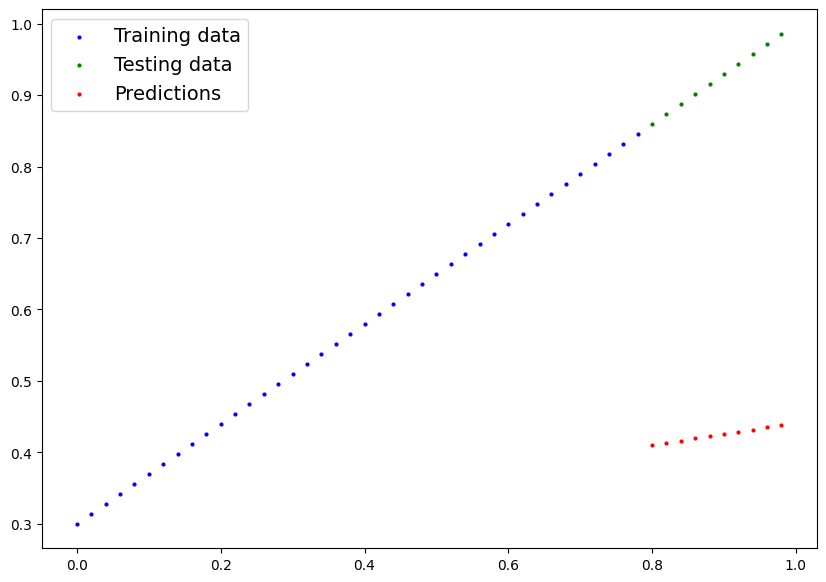

In [170]:
plot_predictions(predictions=Y_preds)

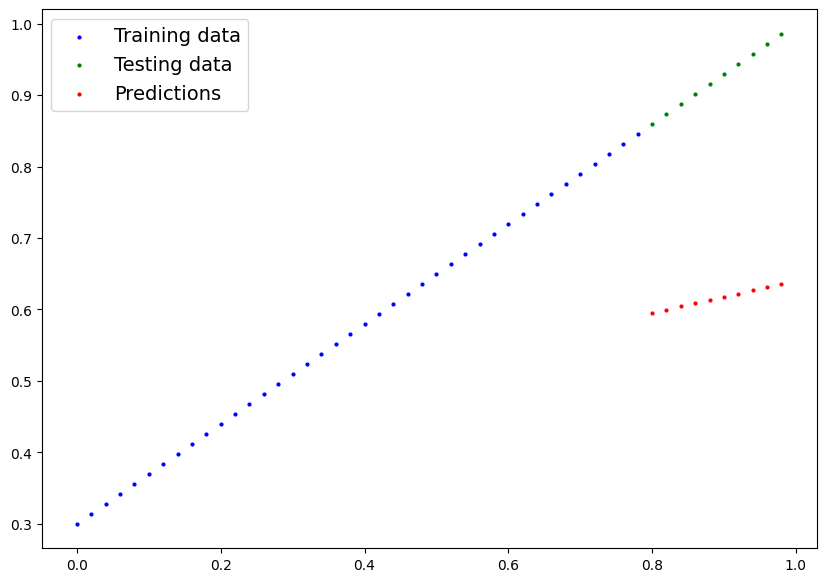

In [184]:
plot_predictions(predictions=y_preds_new);

## Saving a model in Pytorch

There are three main methoda you should about for saving and loading models in Pytorch.

1. `torch.save()` - allows you save a Pytorch object in Python's pickle format.

2. `torch.load()` - allows you to load a saved Pytorch object

3. `torch.nn.module.load_state_dict()` - this allows to load a mmodel's saved state dictionary

In [194]:
# Saving our pytorch model
from pathlib import Path

#1 . create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. create model save path
MODEL_NAME ="01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH =MODEL_PATH / MODEL_NAME

#3. save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [195]:
model_0

LinearRegressionModel()

In [196]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Feb 14 16:54 01_pytorch_workflow_model_0.pth


## Loading a Pytorch model


since we saved our model's `state_dict()` rather than entire model,we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [198]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.2275])), ('bias', tensor([0.4193]))])

In [201]:
# To load in a saved state_dict we have to instantiate a new instaance of our model class
loaded_model_0 =LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with upload parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [202]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.2275])), ('bias', tensor([0.4193]))])

In [203]:
#make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds =loaded_model_0(X_test)
loaded_model_preds

tensor([[0.6013],
        [0.6059],
        [0.6104],
        [0.6150],
        [0.6195],
        [0.6241],
        [0.6286],
        [0.6332],
        [0.6377],
        [0.6423]])

In [205]:
#compare loaded model preds with original model preds
Y_preds==loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [206]:
Y_preds

tensor([[0.4103],
        [0.4134],
        [0.4165],
        [0.4196],
        [0.4227],
        [0.4258],
        [0.4289],
        [0.4320],
        [0.4351],
        [0.4382]])

In [208]:
#make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.6013],
        [0.6059],
        [0.6104],
        [0.6150],
        [0.6195],
        [0.6241],
        [0.6286],
        [0.6332],
        [0.6377],
        [0.6423]])

In [210]:
#compare loaded model preds with original model preds
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 6. Putting it all together
  

  Let's go back to the steps above and see it all in one place.
  

In [212]:
# Import pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#check Pytorch version
torch.__version__

'2.1.0+cu121'

Create device-agnostic code
This means if we've got access to a GPU,our code will use it(for potentially faster computing)
if no GPU is available,the code will default to using Cpu

In [213]:
# Setup device agnostic code
device ="cuda" if torch.cuda.is_available() else "cpu"
print(f"using device:{device}")

using device:cpu


## Data

In [214]:
# create some data using the linear regression formula of y =weight * X + BIAS
weight = 0.7
bias = 0.3
# Create range values
start = 0
end = 1
step = 0.02
#Create X and y (features and labels)

X = torch.arange(start, end, step).unsqueeze(dim=1) #without unsqeeze, errors will pop
y= weight * X + bias
X[:10],y[:10]




(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [216]:
# Split data
train_split =int(0.8 * len(X))
X_train, y_train = X[:train_split],y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

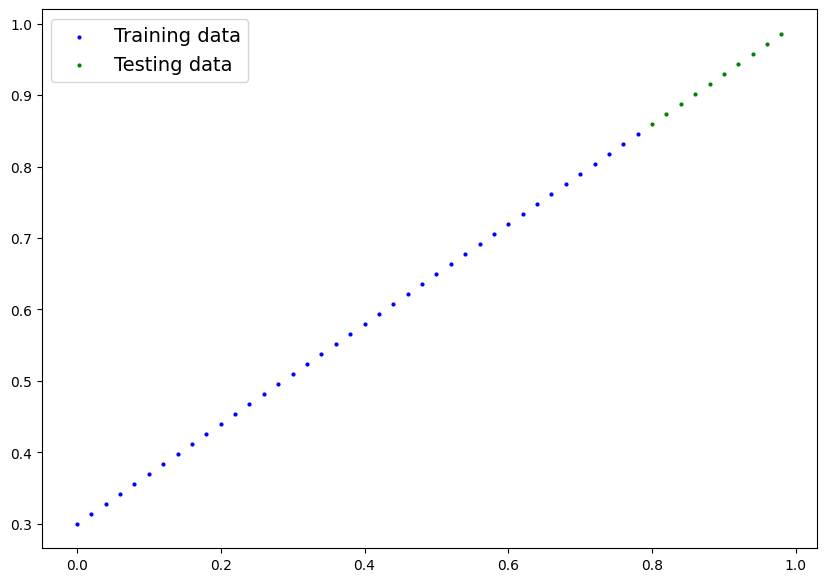

In [217]:
# Plot the data
# Note: If you dont have the plot_predictions() function loaded, this will show error
plot_predictions(X_train, y_train, X_test, y_test)

## Building a Pytorch Linear model

In [226]:
import torch
import torch.nn as nn

# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters// also called: linear transform ,probing layer, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)

# Instantiate the model
model_1 = LinearRegressionModelV2()

# Print the model and its state dictionary
print(model_1)
print(model_1.state_dict())


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


In [220]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [228]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [227]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device


device(type='cpu')

In [229]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

## Training
for trainng we need:
 * Loss function
 * Optimizer
 * Training loop
 * Testing loop

In [231]:
# Setup the loss function
loss_fn =nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [236]:
# Let's  write a training loop
torch.manual_seed(42)

epochs= 200
#put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test =X_test.to(device)
y_test =y_test.to(device)


for epoch in range(epochs):
  model_1.train()
  # 1.Forward pass
  y_pred =model_1(X_train)
  # 2.Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # 3.Optimizer zerograd
  optimizer.zero_grad()
  # 4.Perform backpropagation
  loss.backward()
  # 5.Optimizer step
  optimizer.step

  ### Tesing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred,y_test)

    #Print out what's happening
    if epoch % 10 ==0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")




Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 10 | Loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 20 | Loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 30 | Loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 40 | Loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 50 | Loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 60 | Loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 70 | Loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 80 | Loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 90 | Loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 100 | Loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 110 | Loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 120 | Loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 130 | Loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 140 | Loss: 0.5551779866

In [237]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [239]:
weight, bias

(0.7, 0.3)

### Making and evaluating predictions

In [241]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds =model_1(X_test)
y_preds

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]])

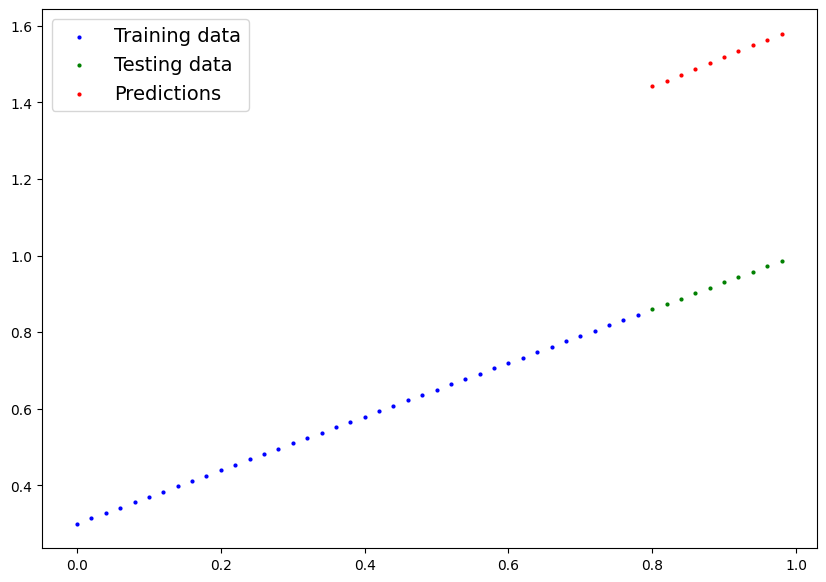

In [244]:
# Check out our model prediction visually
plot_predictions(predictions=y_preds)

### Saving & loading trained model

In [250]:
from pathlib import Path
# 1. Create models directory
MODEL_PATH =Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)


# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH =MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
            f=MODEL_SAVE_PATH)




Saving model to: models/01_pytorch_workflow_model_1.pth


In [252]:
# Load a PyTorch

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the daved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [253]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [254]:
loaded_model_1.state_dict

<bound method Module.state_dict of LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)>

In [255]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])